<a href="https://colab.research.google.com/github/zugbaa/RUSU_projekt_email_spam_filter/blob/main/Email_spam_filter_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/spam.csv")

df = df[['Body', 'Label']]

print(df)

                                                   Body  Label
0     Subject: stock promo mover : cwtd\n * * * urge...      1
1     Subject: are you listed in major search engine...      1
2     Subject: important information thu , 30 jun 20...      1
3     Subject: = ? utf - 8 ? q ? bask your life with...      1
4     Subject: " bidstogo " is places to go , things...      1
...                                                 ...    ...
3995  Subject: revison # 1 - hpl noms . for november...      0
3996  Subject: hpl nom for december 27 , 2000\n ( se...      0
3997  Subject: akamai\n kevin ,\n i have followed up...      0
3998  Subject: re : summary spreadsheet for data ven...      0
3999  Subject: re : congratulations\n congratulation...      0

[4000 rows x 2 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], stratify=df['Label'])

In [ ]:
# Tokenize the email text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert the text data to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Print the model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
94/94 [==============================] - 8s 66ms/step - loss: 0.5384 - accuracy: 0.7553 - val_loss: 0.1957 - val_accuracy: 0.9420
Epoch 2/50
94/94 [==============================] - 5s 52ms/step - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.1011 - val_accuracy: 0.9590
Epoch 3/50
94/94 [==============================] - 5s 48ms/step - loss: 0.0183 - accuracy: 0.9963 - val_loss: 0.0968 - val_accuracy: 0.9610
Epoch 4/50
94/94 [==============================] - 7s 70ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.1039 - val_accuracy: 0.9620
Epoch 5/50
94/94 [==============================] - 4s 48ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1041 - val_accuracy: 0.9600
Epoch 6/50
94/94 [==============================] - 5s 48ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.1085 - val_accuracy: 0.9600


In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

32/32 [==============================] - 0s 10ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
print(y_predicted)

[1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[480  20]
 [ 19 481]]


Text(50.722222222222214, 0.5, 'truth')

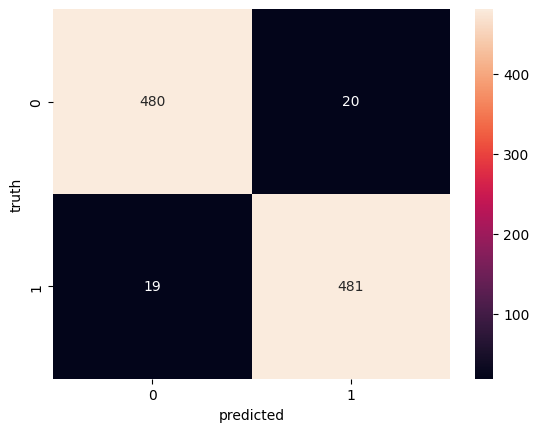

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

